In [1]:
# Cervical Cancer Risk Prediction - Machine Learning Models
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report
)
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Data Loading and Initial Exploration
# Import the csv file
cancer_df = pd.read_csv('./data/risk_factors_cervical_cancer.csv')

# Let's explore the dataframe
print("First few rows of the dataset:")
display(cancer_df.head())

# Get data frame info
print("\nDataframe info:")
cancer_df.info()

# Get the statistics of the data frame
print("\nDescriptive statistics:")
display(cancer_df.describe())

First few rows of the dataset:


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0



Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 n

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


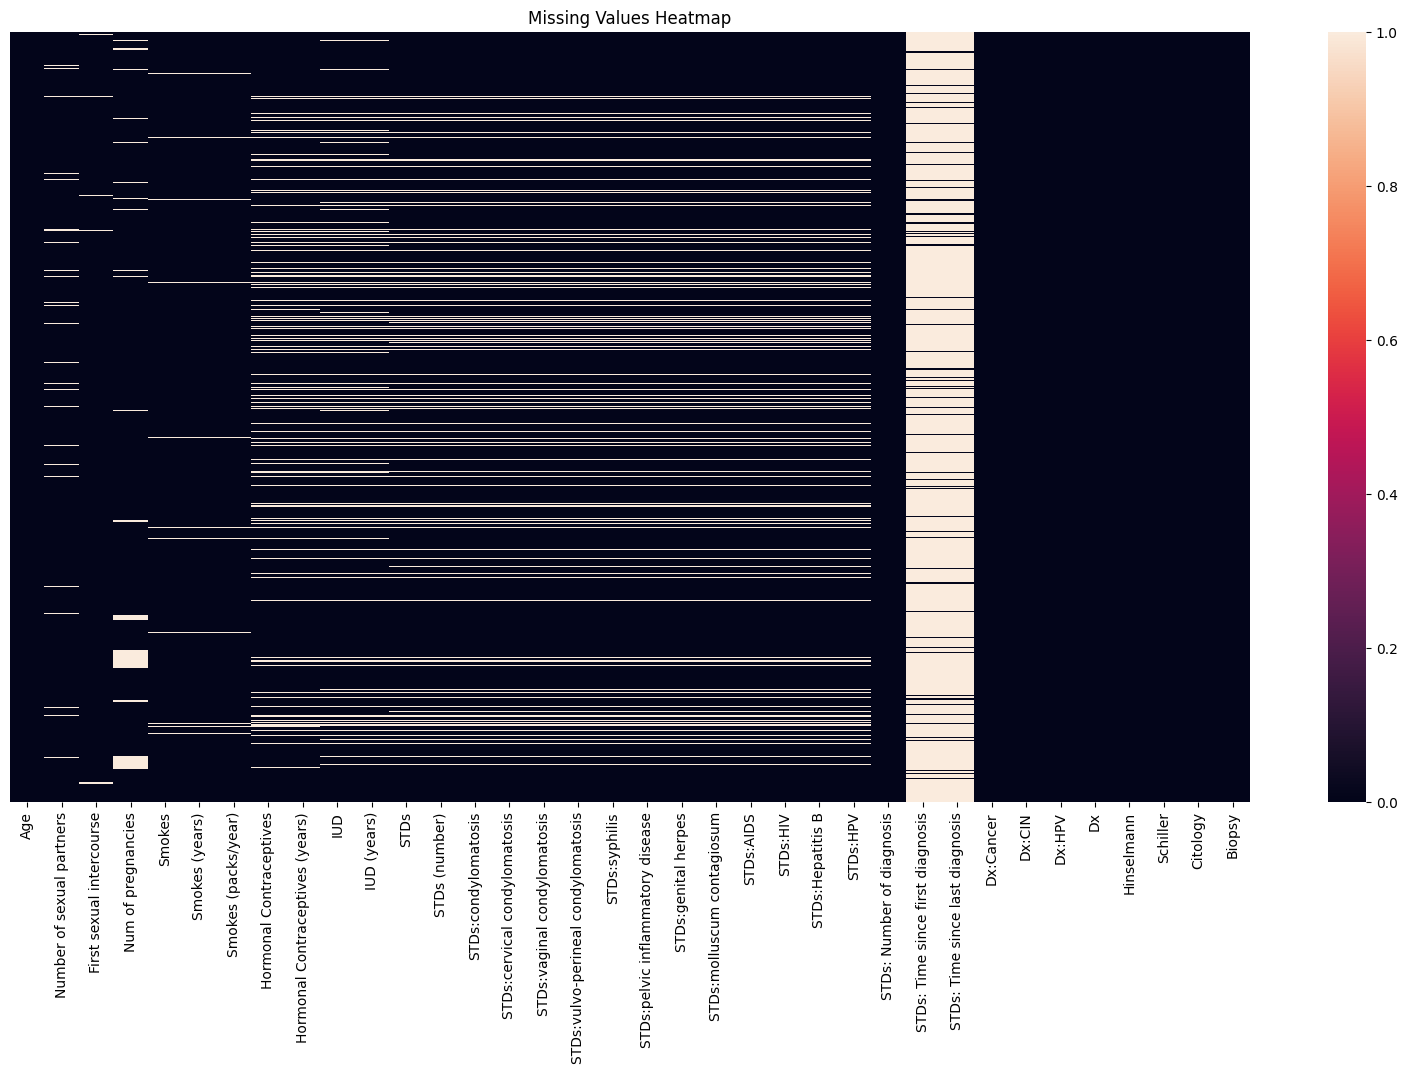


Dataframe info after type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs  

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


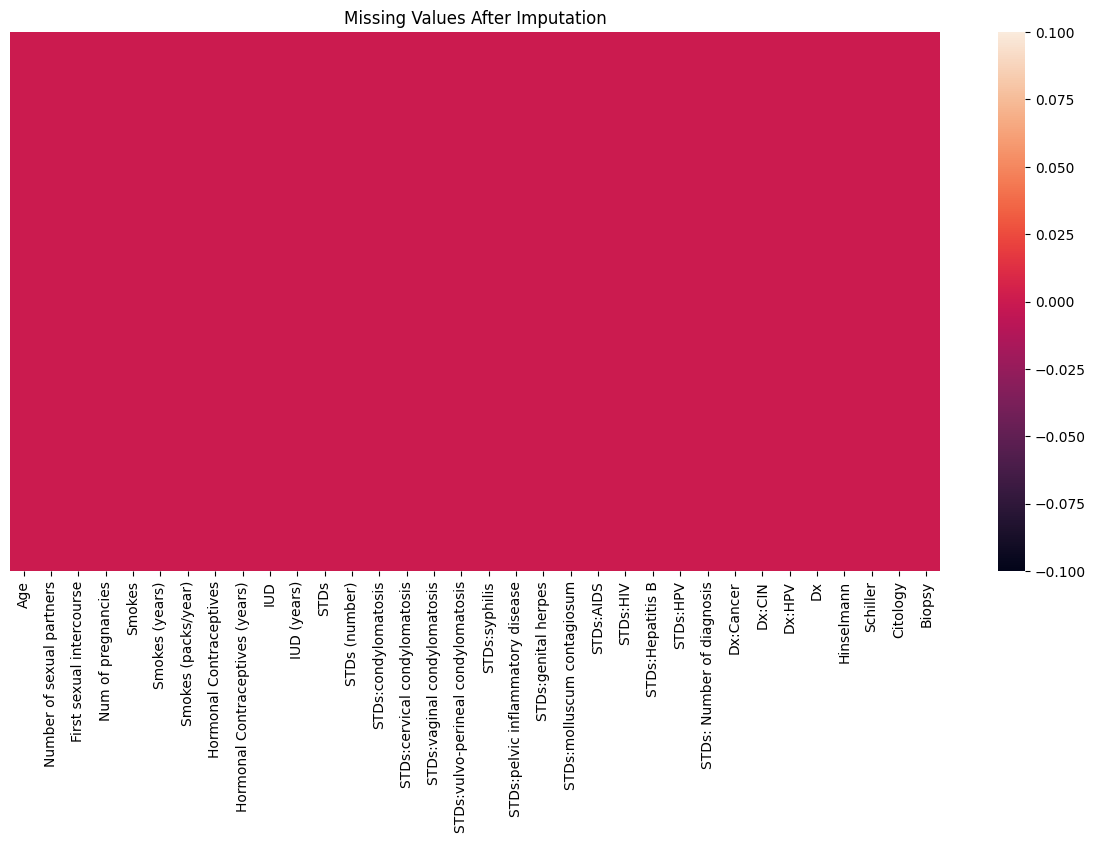

In [3]:
# 2. Data Preprocessing
# Replace '?' with NaN
cancer_df = cancer_df.replace('?', np.nan)

# Plot missing values heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cancer_df.isnull(), yticklabels=False, cbar=True)
plt.title('Missing Values Heatmap')
plt.show()

# Drop columns with more than 80% missing values
cancer_df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], inplace=True)

# Convert all columns to numeric type
cancer_df = cancer_df.apply(pd.to_numeric)

# Get updated dataframe info
print("\nDataframe info after type conversion:")
cancer_df.info()

# Check statistics after conversion
print("\nDescriptive statistics after conversion:")
display(cancer_df.describe())

# Replace null values with mean
cancer_df.fillna(cancer_df.mean(), inplace=True)

# Verify no missing values
plt.figure(figsize=(15, 7))
sns.heatmap(cancer_df.isnull(), yticklabels=False)
plt.title('Missing Values After Imputation')
plt.show()

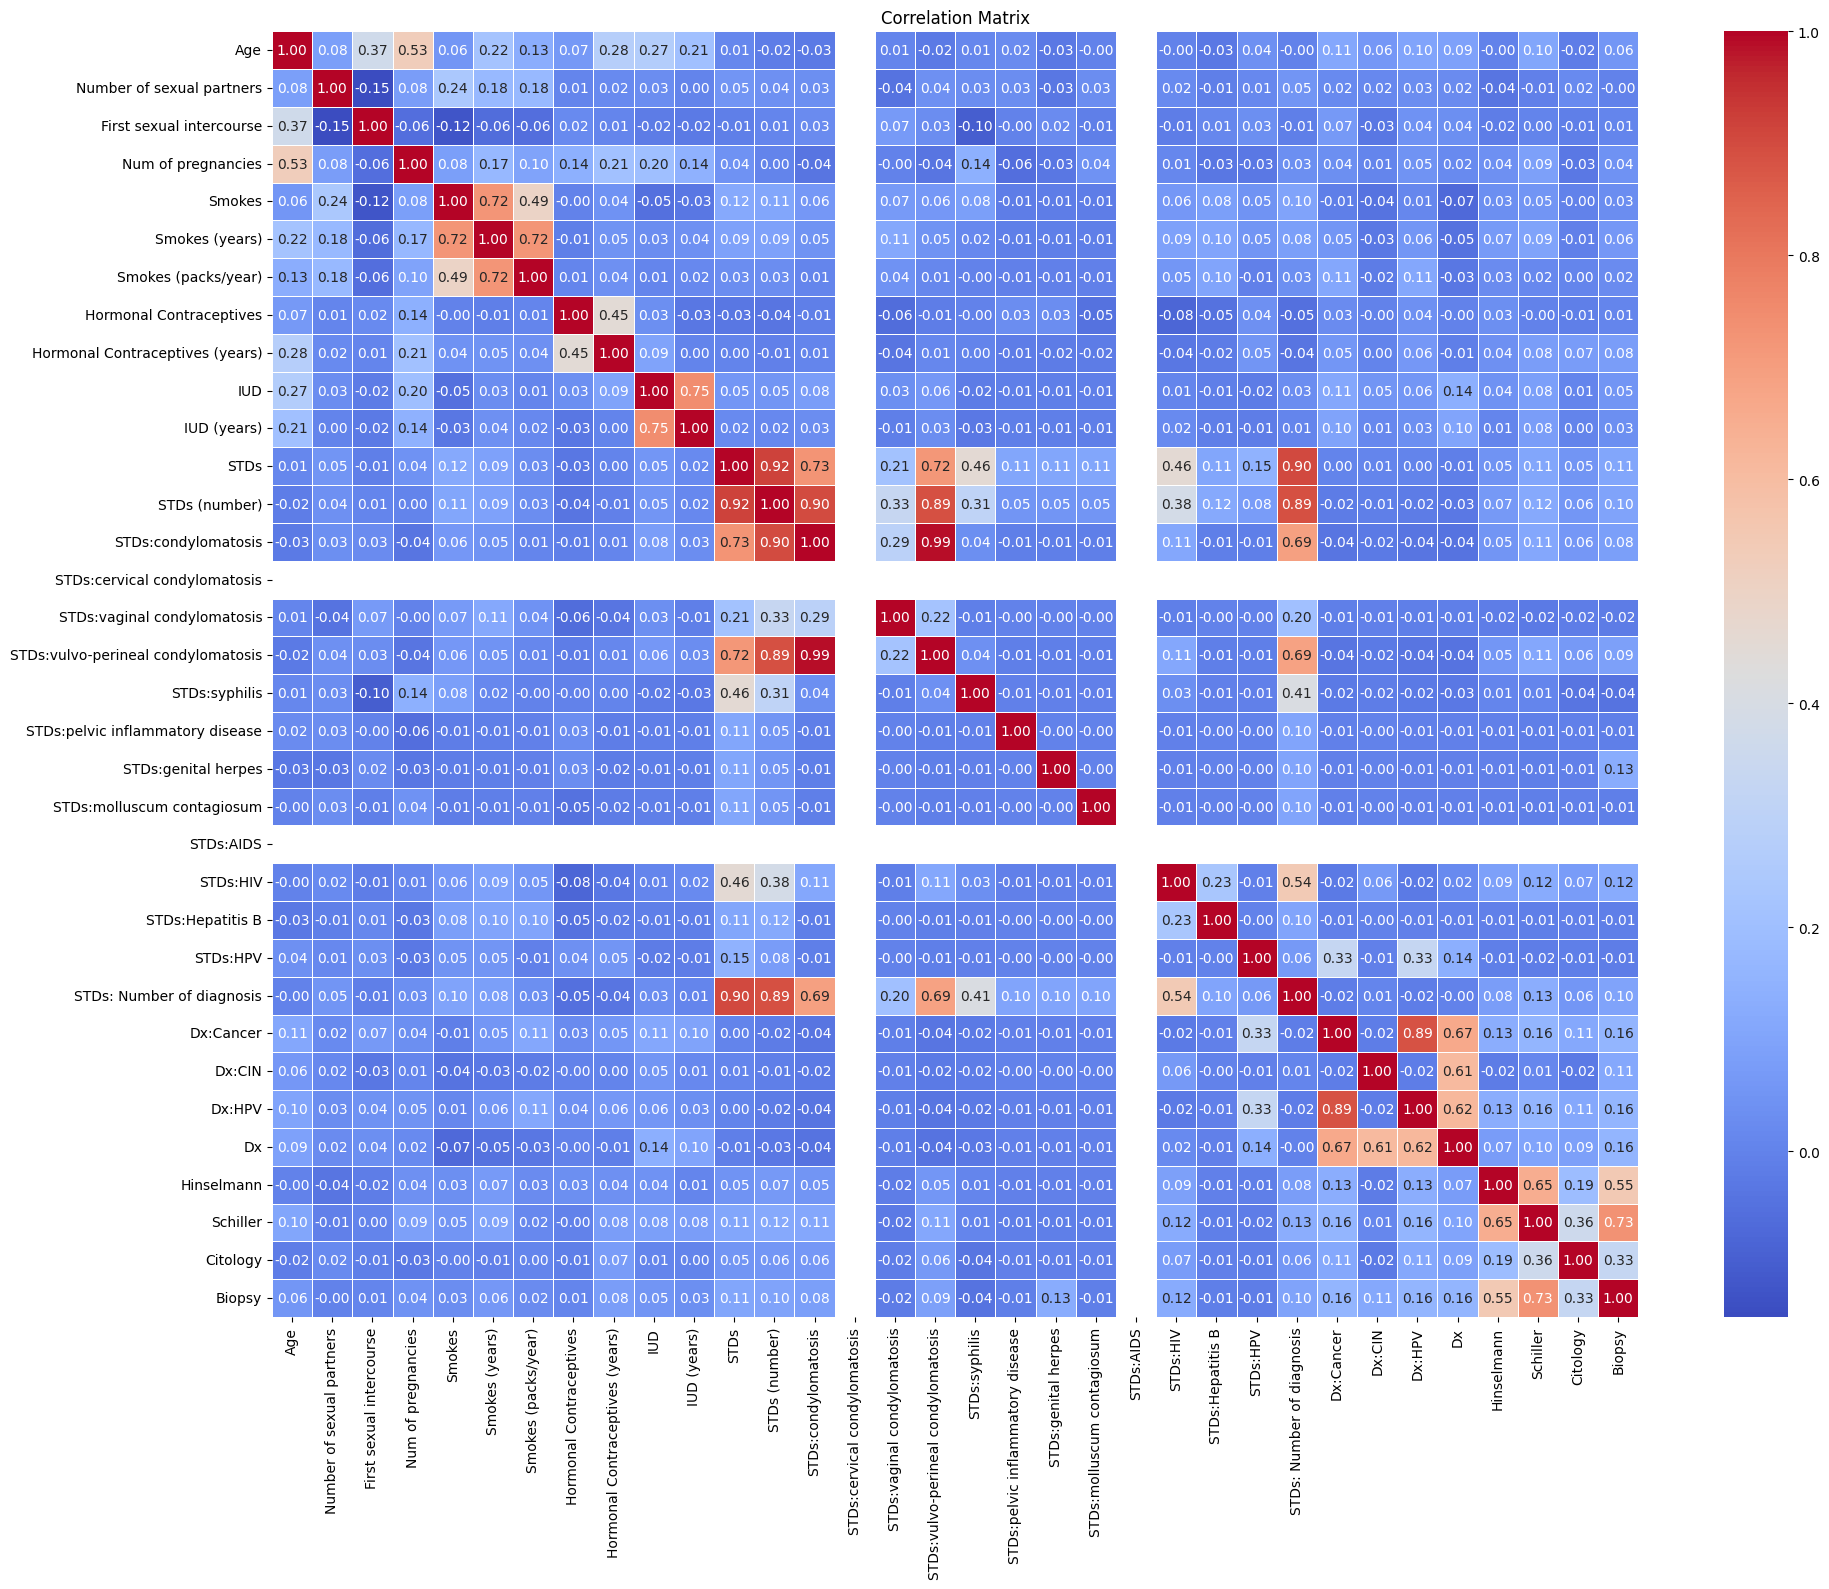

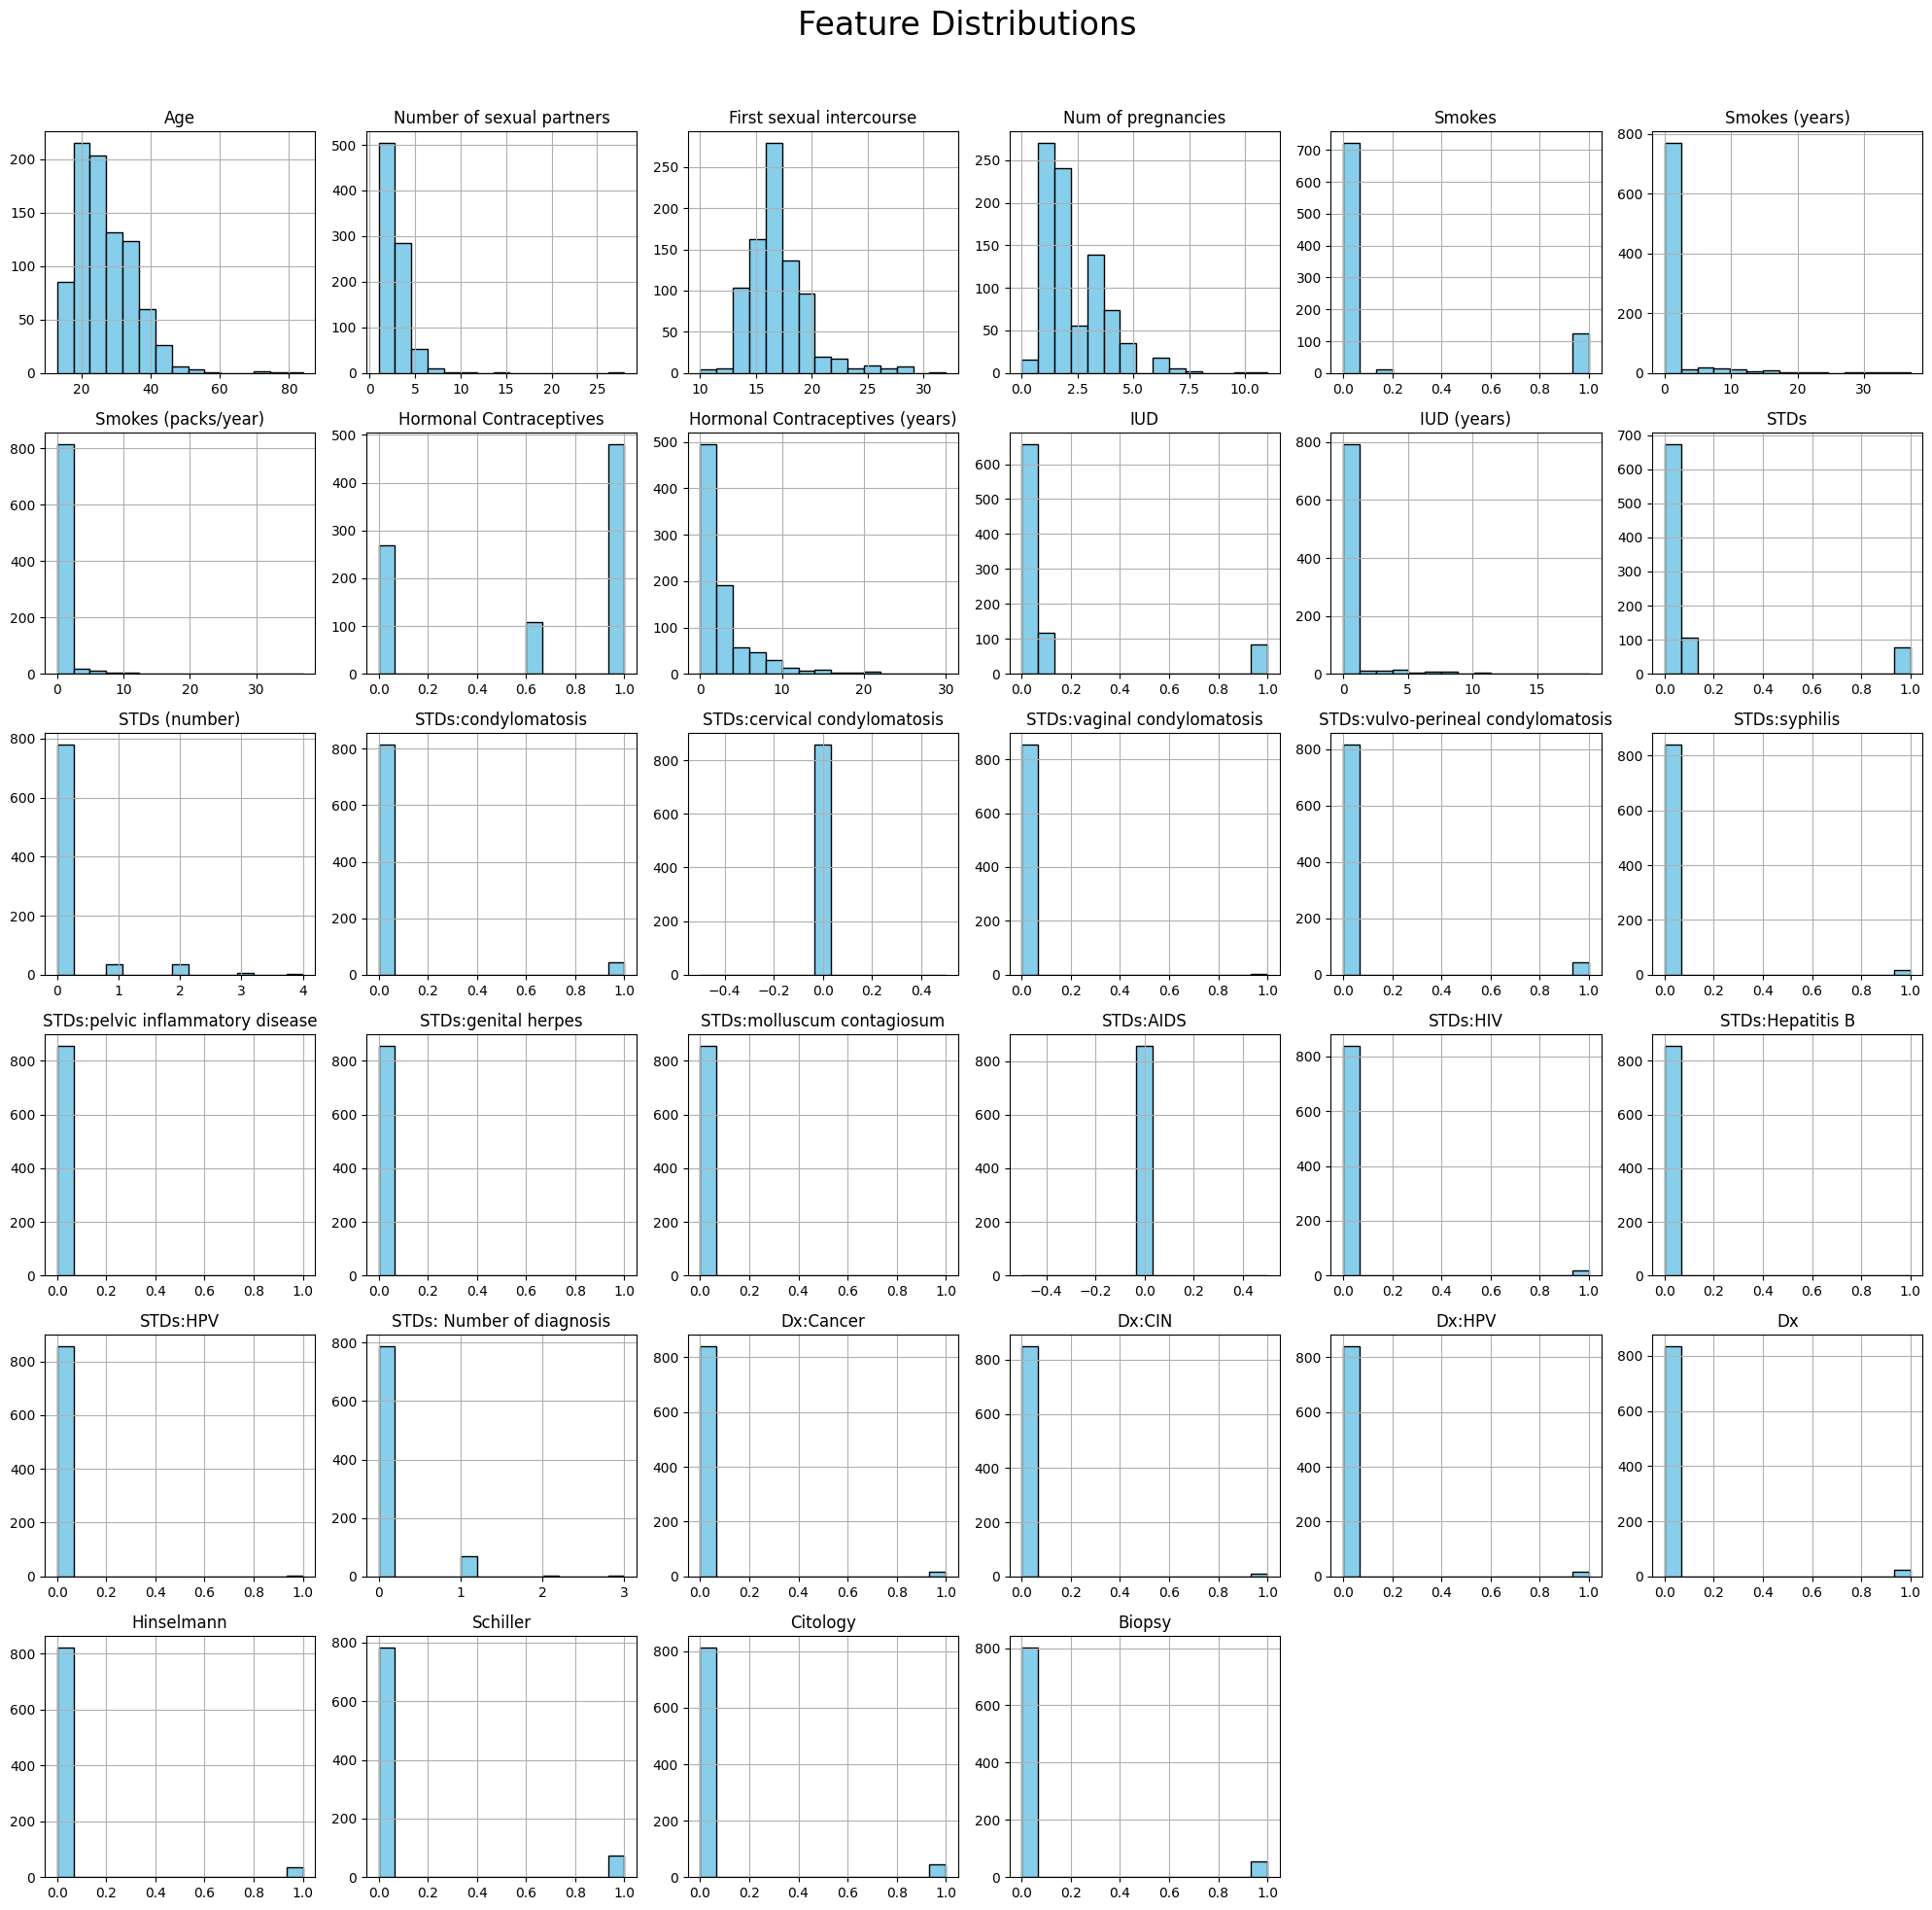

In [4]:
# 3. Data Analysis
# Get the correlation matrix
corr_matrix = cancer_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Plot histograms for all features
cancer_df.hist(bins=15, figsize=(20, 20), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [5]:
# 4. Data Preparation for Modeling
# Separate target and features
target_df = cancer_df['Biopsy']
input_df = cancer_df.drop(columns=['Biopsy'])

# Convert to numpy arrays
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

# Reshape y for compatibility
y = y.reshape(-1, 1)
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

X shape: (858, 33), y shape: (858, 1)
Training set: 600 samples
Validation set: 129 samples
Test set: 129 samples


In [6]:
# 5. Model Evaluation Functions
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    """Evaluate a model and return performance metrics"""
    # Train the model
    start_time = time.time()
    model.fit(X_train, Y_train.ravel())
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    
    # Calculate ROC AUC if the model has predict_proba
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(Y_test, y_pred_proba)
    except:
        roc_auc = None
    
    return {
        'model': model.__class__.__name__,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'training_time': training_time,
        'y_pred': y_pred
    }

def plot_confusion_matrix(y_true, y_pred, model_name):
    """Plot a confusion matrix for model predictions"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9535, F1: 0.5714


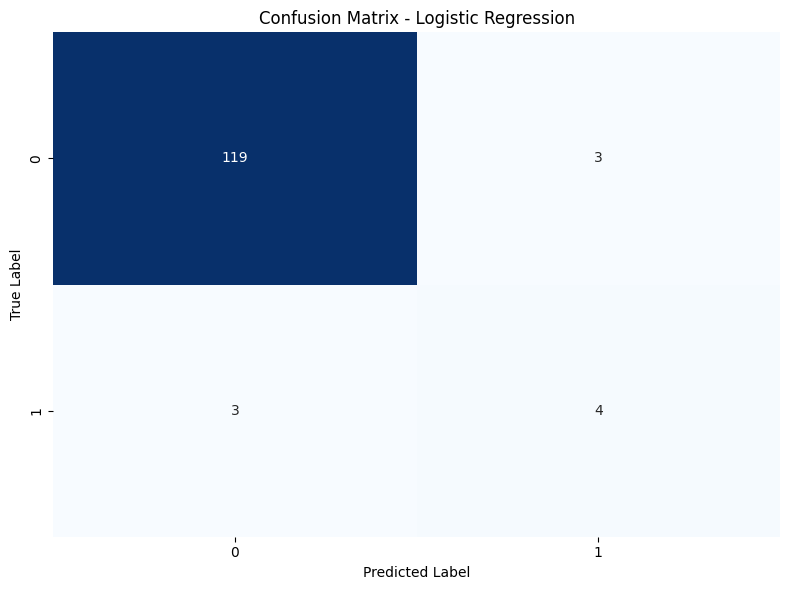

Training Random Forest...
Random Forest - Accuracy: 0.9535, F1: 0.5000


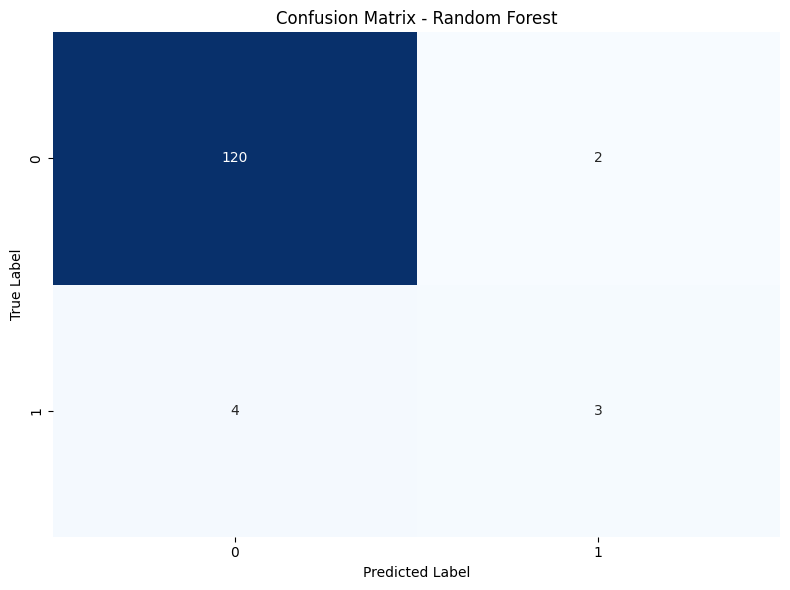

Training SVM...
SVM - Accuracy: 0.9457, F1: 0.2222


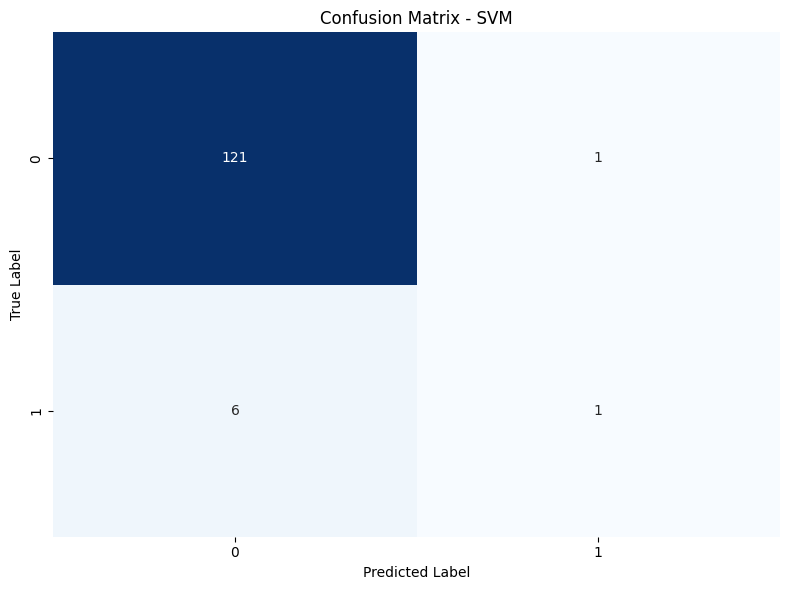

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.9612, F1: 0.6667


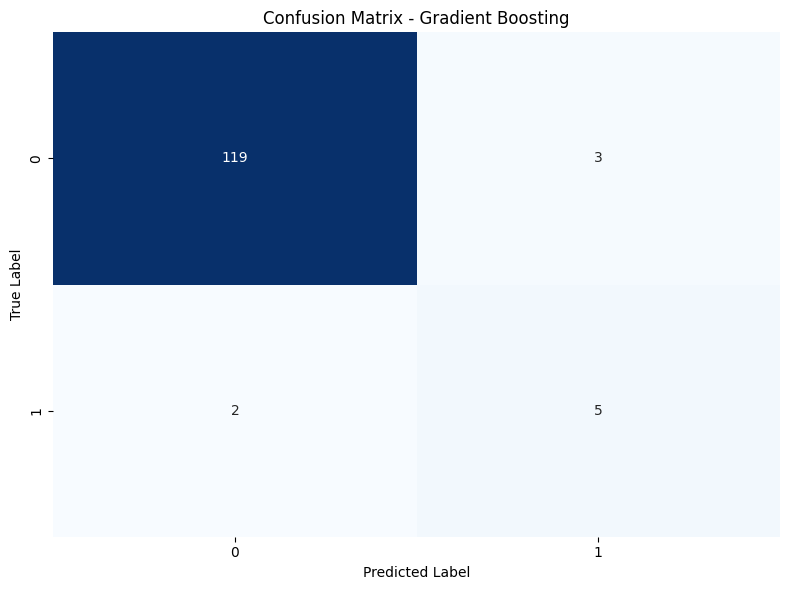

Training XGBoost...
XGBoost - Accuracy: 0.9612, F1: 0.6154


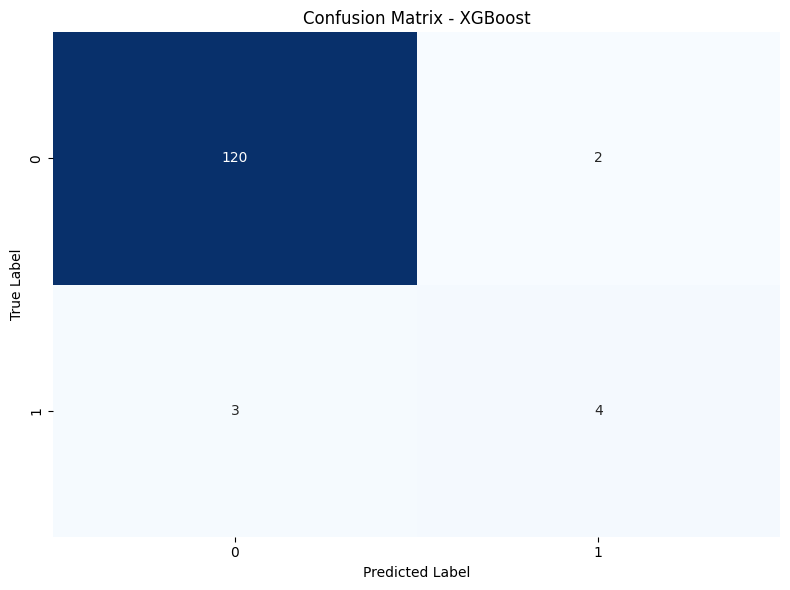

Training Neural Network...
Neural Network - Accuracy: 0.9457, F1: 0.5333


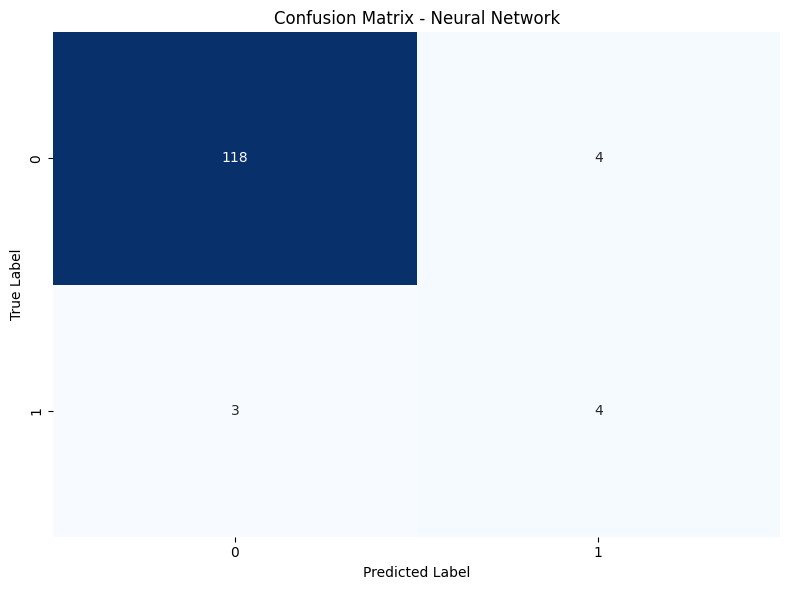

Training KNN...
KNN - Accuracy: 0.9535, F1: 0.4000


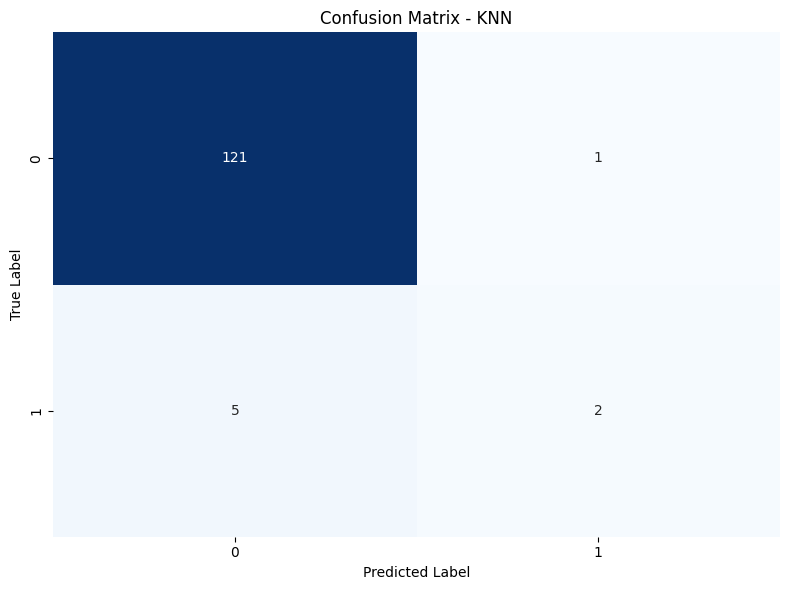


Baseline Model Performance:


,model,accuracy,precision,recall,f1_score,roc_auc,training_time
3,Gradient Boosting,0.961240,0.625000,0.714286,0.666667,0.943794,0.104429
4,XGBoost,0.961240,0.666667,0.571429,0.615385,0.956674,0.096651
0,Logistic Regression,0.953488,0.571429,0.571429,0.571429,0.932084,0.012093
5,Neural Network,0.945736,0.500000,0.571429,0.533333,0.929742,0.808728
1,Random Forest,0.953488,0.600000,0.428571,0.500000,0.983021,0.094582
6,KNN,0.953488,0.666667,0.285714,0.400000,0.834895,0.001040
2,SVM,0.945736,0.500000,0.142857,0.222222,0.859485,0.017311


In [7]:
# 6. Baseline Models Training and Evaluation
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Evaluate all baseline models
baseline_results = []

for name, model in models.items():
    print(f"Training {name}...")
    result = evaluate_model(model, X_train, X_val, Y_train, Y_val)
    result['model'] = name
    baseline_results.append(result)
    print(f"{name} - Accuracy: {result['accuracy']:.4f}, F1: {result['f1_score']:.4f}")
    plot_confusion_matrix(Y_val, result['y_pred'], name)

# Create a dataframe with baseline results
baseline_results_df = pd.DataFrame([{k: v for k, v in r.items() if k != 'y_pred'} for r in baseline_results])
baseline_results_df = baseline_results_df.sort_values('f1_score', ascending=False)
print("\nBaseline Model Performance:")
display(baseline_results_df)

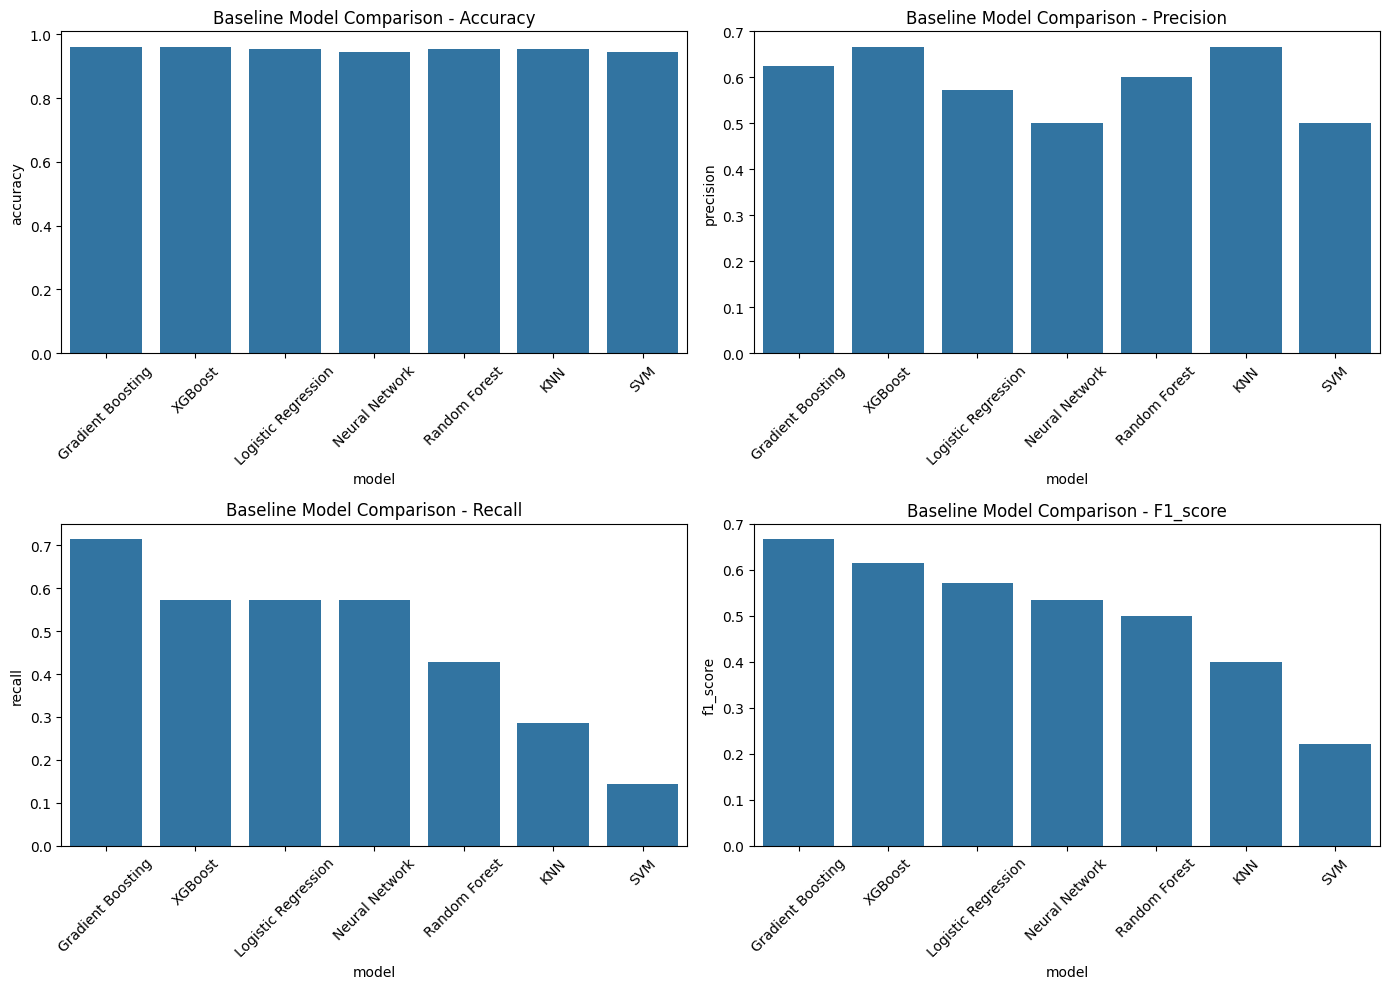

In [8]:
# 7. Plot baseline model comparison
plt.figure(figsize=(14, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='model', y=metric, data=baseline_results_df)
    plt.title(f'Baseline Model Comparison - {metric.capitalize()}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# 8. Hyperparameter Tuning
# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    n_iter=20,
    random_state=42
)

print("Tuning Random Forest...")
rf_grid.fit(X_train, Y_train.ravel())
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best score: {rf_grid.best_score_:.4f}")

# XGBoost hyperparameter tuning - Fixed version
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid = RandomizedSearchCV(
    xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    xgb_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    n_iter=20,
    random_state=42
)

print("Tuning XGBoost...")
xgb_grid.fit(X_train, Y_train.ravel())  # Fixed: using ravel() on Y_train
print(f"Best parameters: {xgb_grid.best_params_}")
print(f"Best score: {xgb_grid.best_score_:.4f}")

# Gradient Boosting hyperparameter tuning
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

gb_grid = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    n_iter=20,
    random_state=42
)

print("Tuning Gradient Boosting...")
gb_grid.fit(X_train, Y_train.ravel())
print(f"Best parameters: {gb_grid.best_params_}")
print(f"Best score: {gb_grid.best_score_:.4f}")

Tuning Random Forest...
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best score: 0.5156
Tuning XGBoost...
Best parameters: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best score: 0.5969
Tuning Gradient Boosting...
Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.2}
Best score: 0.6940


Evaluating Tuned Random Forest...
Tuned Random Forest - Accuracy: 0.9612, F1: 0.6154


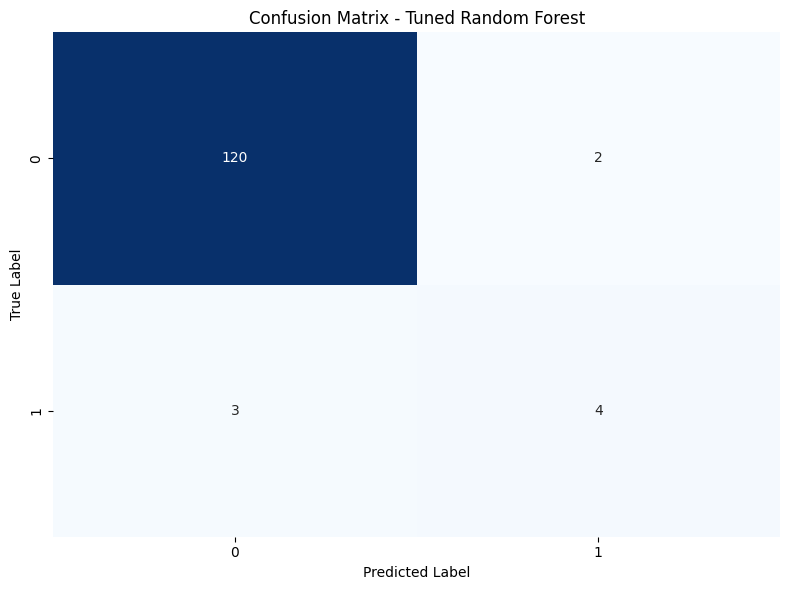

Evaluating Tuned XGBoost...
Tuned XGBoost - Accuracy: 0.9612, F1: 0.6154


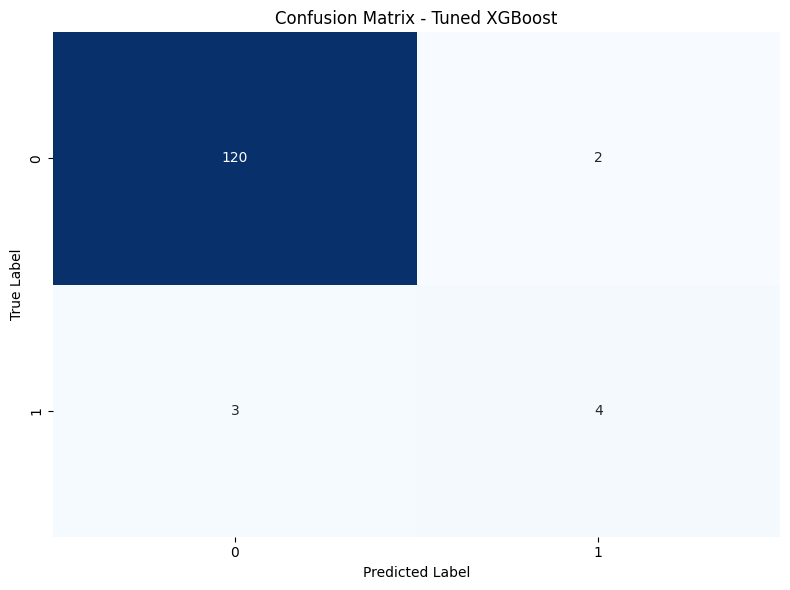

Evaluating Tuned Gradient Boosting...
Tuned Gradient Boosting - Accuracy: 0.9535, F1: 0.5000


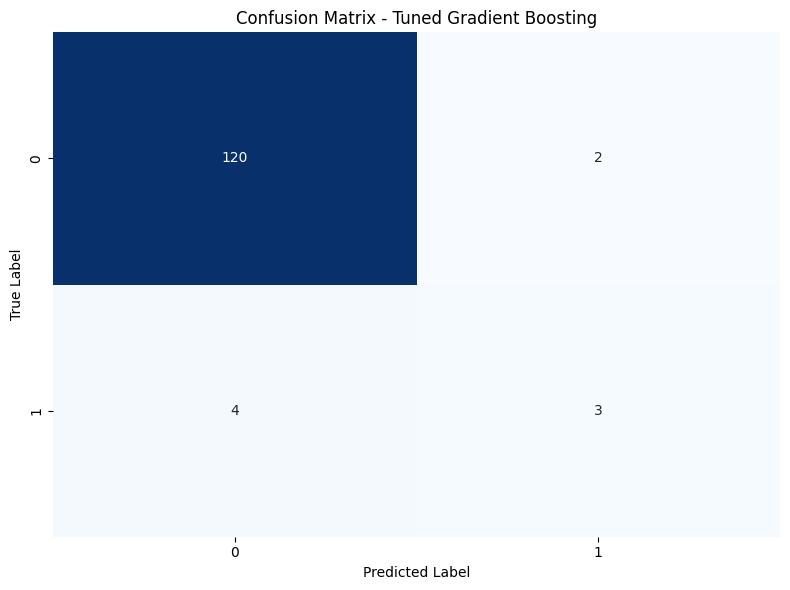

In [10]:
# 9. Create and Evaluate Tuned Models
# Create the best models using the tuned parameters
best_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
best_xgb = xgb.XGBClassifier(**xgb_grid.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_gb = GradientBoostingClassifier(**gb_grid.best_params_, random_state=42)

best_models = {
    'Tuned Random Forest': best_rf,
    'Tuned XGBoost': best_xgb,
    'Tuned Gradient Boosting': best_gb
}

tuned_results = []

for name, model in best_models.items():
    print(f"Evaluating {name}...")
    result = evaluate_model(model, X_train, X_val, Y_train, Y_val)
    result['model'] = name
    tuned_results.append(result)
    print(f"{name} - Accuracy: {result['accuracy']:.4f}, F1: {result['f1_score']:.4f}")
    plot_confusion_matrix(Y_val, result['y_pred'], name)


Final Model Comparison:


,model,accuracy,precision,recall,f1_score,roc_auc,training_time
3,Gradient Boosting,0.961240,0.625000,0.714286,0.666667,0.943794,0.104429
4,XGBoost,0.961240,0.666667,0.571429,0.615385,0.956674,0.096651
7,Tuned Random Forest,0.961240,0.666667,0.571429,0.615385,0.985948,0.142473
8,Tuned XGBoost,0.961240,0.666667,0.571429,0.615385,0.974239,0.020921
0,Logistic Regression,0.953488,0.571429,0.571429,0.571429,0.932084,0.012093
5,Neural Network,0.945736,0.500000,0.571429,0.533333,0.929742,0.808728
1,Random Forest,0.953488,0.600000,0.428571,0.500000,0.983021,0.094582
9,Tuned Gradient Boosting,0.953488,0.600000,0.428571,0.500000,0.957845,0.252247
6,KNN,0.953488,0.666667,0.285714,0.400000,0.834895,0.001040
2,SVM,0.945736,0.500000,0.142857,0.222222,0.859485,0.017311


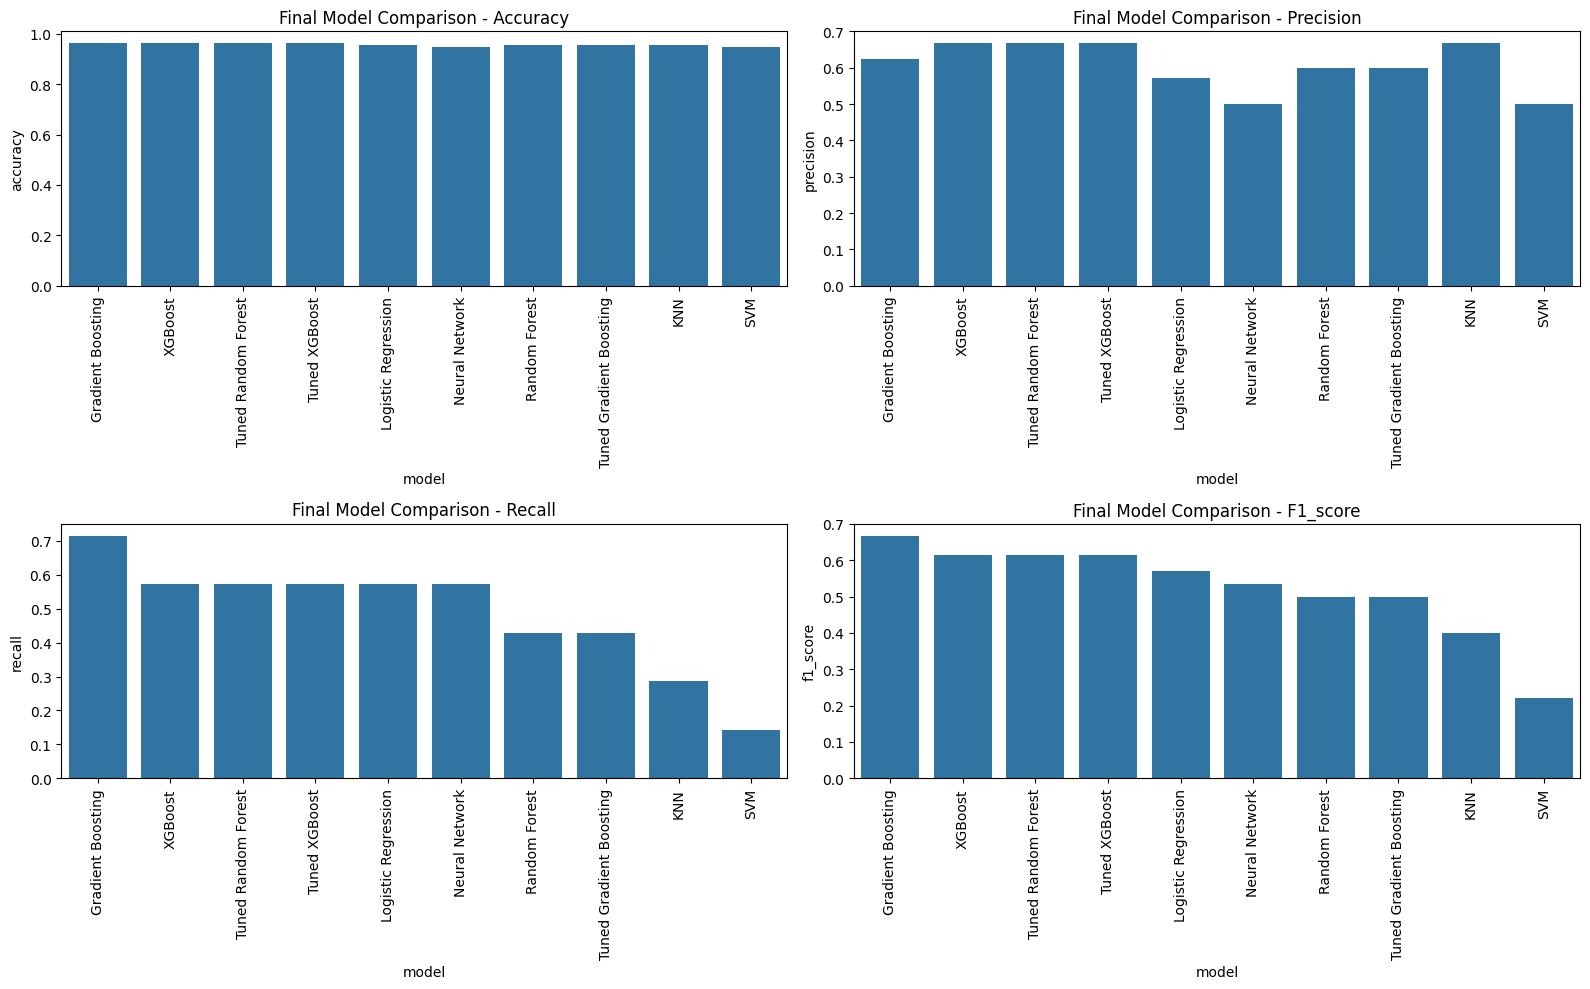

In [11]:
# 10. Final Model Comparison
# Combine baseline and tuned model results
final_results = baseline_results + tuned_results

# Create final comparison dataframe
final_df = pd.DataFrame([{k: v for k, v in r.items() if k != 'y_pred'} for r in final_results])
final_df = final_df.sort_values('f1_score', ascending=False)
print("\nFinal Model Comparison:")
display(final_df)

# Plot final model comparison
plt.figure(figsize=(16, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='model', y=metric, data=final_df)
    plt.title(f'Final Model Comparison - {metric.capitalize()}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Best model based on F1 score: Gradient Boosting


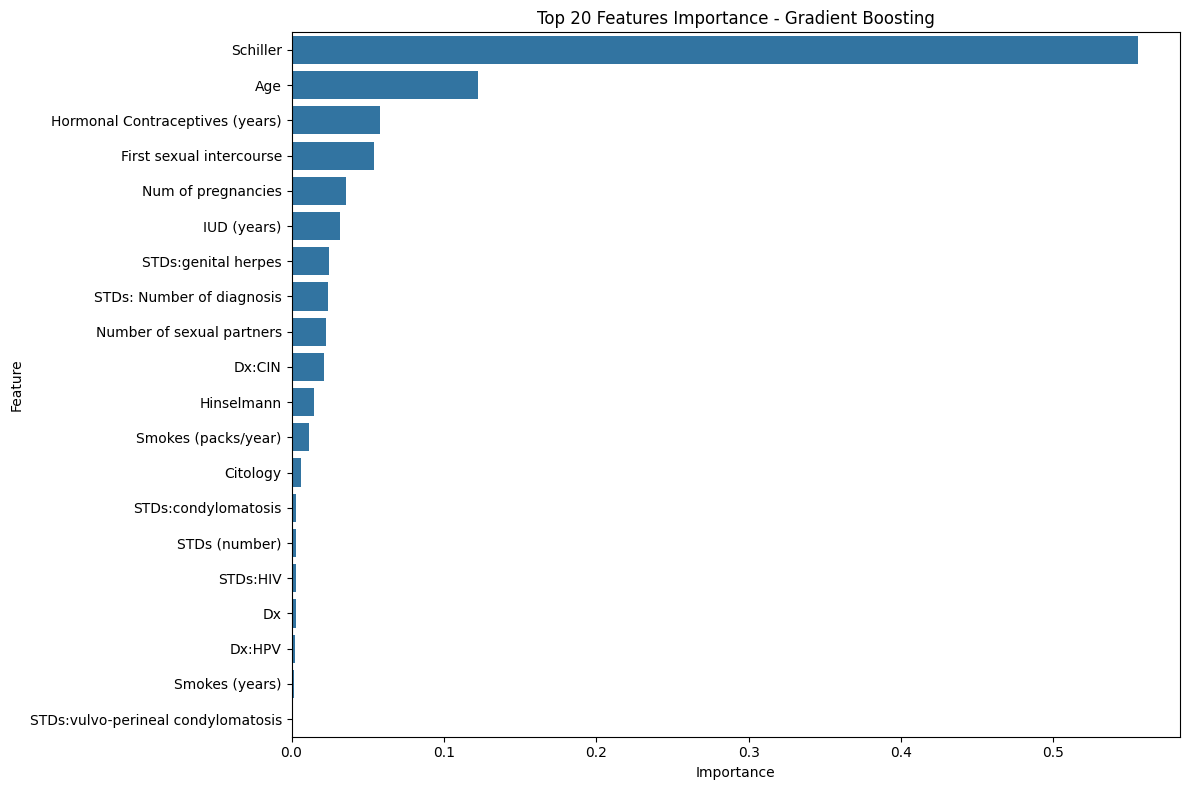

Top 10 most important features:


,Feature,Importance
31,Schiller,0.555254
0,Age,0.122250
8,Hormonal Contraceptives (years),0.057921
2,First sexual intercourse,0.054374
3,Num of pregnancies,0.035972
10,IUD (years),0.031952
19,STDs:genital herpes,0.024633
25,STDs: Number of diagnosis,0.023758
1,Number of sexual partners,0.022924
27,Dx:CIN,0.021136


In [12]:
# 11. Best Model Analysis
# Get the best model based on F1 score
best_model_name = final_df.iloc[0]['model']
print(f"Best model based on F1 score: {best_model_name}")

# Map model name to actual model object
if 'Random Forest' in best_model_name:
    best_model = best_rf
elif 'XGBoost' in best_model_name:
    best_model = best_xgb
elif 'Gradient Boosting' in best_model_name:
    best_model = best_gb
else:
    best_model = models[best_model_name]

# Get feature importance for tree-based models
try:
    feature_importances = best_model.feature_importances_
    feature_names = input_df.columns
    
    # Create dataframe for feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title(f'Top 20 Features Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    # Print top 10 features
    print("Top 10 most important features:")
    display(importance_df.head(10))
except:
    print("Feature importance not available for this model type")

Training final model on 729 samples...

Final Test Set Evaluation:
Model: Gradient Boosting
Test Accuracy: 0.9612
Test Precision: 0.6667
Test Recall: 0.7500
Test F1 Score: 0.7059


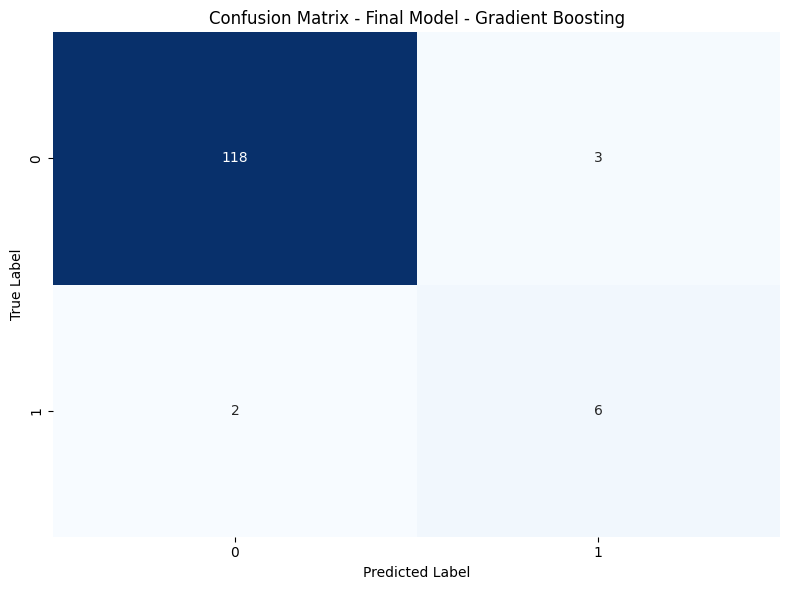


Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       121
         1.0       0.67      0.75      0.71         8

    accuracy                           0.96       129
   macro avg       0.82      0.86      0.84       129
weighted avg       0.96      0.96      0.96       129

Test ROC AUC: 0.9680


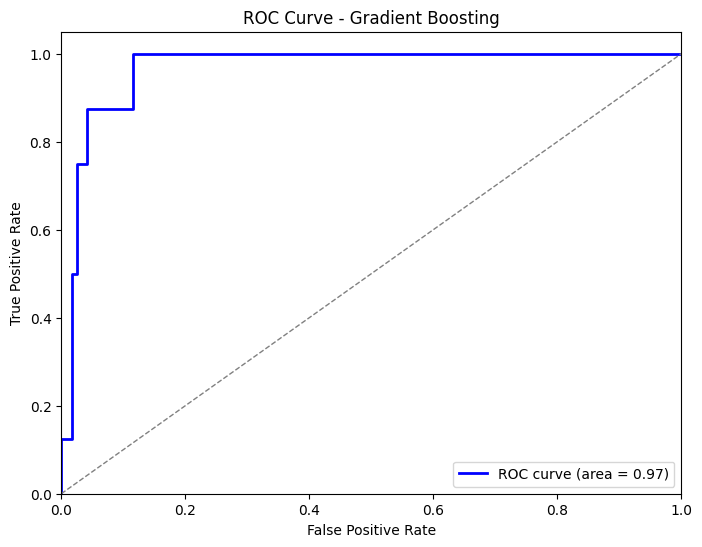

In [13]:
# 12. Final Evaluation on Test Set
# Fit the best model on the combined training and validation data
X_train_full = np.vstack((X_train, X_val))
Y_train_full = np.vstack((Y_train, Y_val))

print(f"Training final model on {X_train_full.shape[0]} samples...")
best_model.fit(X_train_full, Y_train_full.ravel())

# Make predictions on test set
test_predictions = best_model.predict(X_test)

# Calculate final metrics
final_accuracy = accuracy_score(Y_test, test_predictions)
final_precision = precision_score(Y_test, test_predictions)
final_recall = recall_score(Y_test, test_predictions)
final_f1 = f1_score(Y_test, test_predictions)

print("\nFinal Test Set Evaluation:")
print(f"Model: {best_model_name}")
print(f"Test Accuracy: {final_accuracy:.4f}")
print(f"Test Precision: {final_precision:.4f}")
print(f"Test Recall: {final_recall:.4f}")
print(f"Test F1 Score: {final_f1:.4f}")

# Plot final confusion matrix
plot_confusion_matrix(Y_test, test_predictions, f"Final Model - {best_model_name}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(Y_test, test_predictions))

# Calculate ROC AUC if available
try:
    test_proba = best_model.predict_proba(X_test)[:, 1]
    test_roc_auc = roc_auc_score(Y_test, test_proba)
    print(f"Test ROC AUC: {test_roc_auc:.4f}")
    
    # Plot ROC curve
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(Y_test, test_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc="lower right")
    plt.show()
except:
    print("ROC AUC calculation not available for this model type")

In [14]:
# 13. Save the Best Model and Artifacts
# Create a directory for model artifacts
import os
os.makedirs('model_artifacts', exist_ok=True)

# Save the best model
model_filename = f'model_artifacts/cervical_cancer_best_model_{best_model_name.replace(" ", "_").lower()}.joblib'
joblib.dump(best_model, model_filename)
print(f"\nBest model saved to: {model_filename}")

# Save the scaler
scaler_filename = 'model_artifacts/cervical_cancer_scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to: {scaler_filename}")

# Save feature names
feature_names_filename = 'model_artifacts/feature_names.joblib'
joblib.dump(list(input_df.columns), feature_names_filename)
print(f"Feature names saved to: {feature_names_filename}")


Best model saved to: model_artifacts/cervical_cancer_best_model_gradient_boosting.joblib
Scaler saved to: model_artifacts/cervical_cancer_scaler.joblib
Feature names saved to: model_artifacts/feature_names.joblib


In [15]:
# 14. Create a Prediction Function
def predict_cancer_risk(data, model_path=model_filename, scaler_path=scaler_filename, feature_names_path=feature_names_filename):
    """
    Predict cervical cancer risk for new data
    
    Parameters:
    - data: pandas DataFrame with same features as training data
    - model_path: path to saved model
    - scaler_path: path to saved scaler
    - feature_names_path: path to saved feature names
    
    Returns:
    - Prediction probabilities
    """
    # Load model and artifacts
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    feature_names = joblib.load(feature_names_path)
    
    # Ensure data has the same features in the same order
    data = data[feature_names]
    
    # Scale the data
    data_scaled = scaler.transform(data)
    
    # Make prediction
    try:
        # Return probability of positive class if available
        return model.predict_proba(data_scaled)[:, 1]
    except:
        # Otherwise return binary prediction
        return model.predict(data_scaled)

# Example usage of the prediction function
print("\nExample of using the prediction function:")
print("For a new patient with these features:")
example_data = input_df.head(1)
display(example_data)

# Save to CSV for future use
example_data.to_csv('model_artifacts/example_input.csv', index=False)
print("Example input saved to: model_artifacts/example_input.csv")

# Load and use the saved model
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)

# Scale the example data
example_scaled = loaded_scaler.transform(example_data)

# Make prediction
example_prob = loaded_model.predict_proba(example_scaled)[:, 1]
print(f"Predicted probability of cancer: {example_prob[0]:.4f}")


Example of using the prediction function:
For a new patient with these features:


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


Example input saved to: model_artifacts/example_input.csv
Predicted probability of cancer: 0.0000



Generating SHAP values for model interpretation...


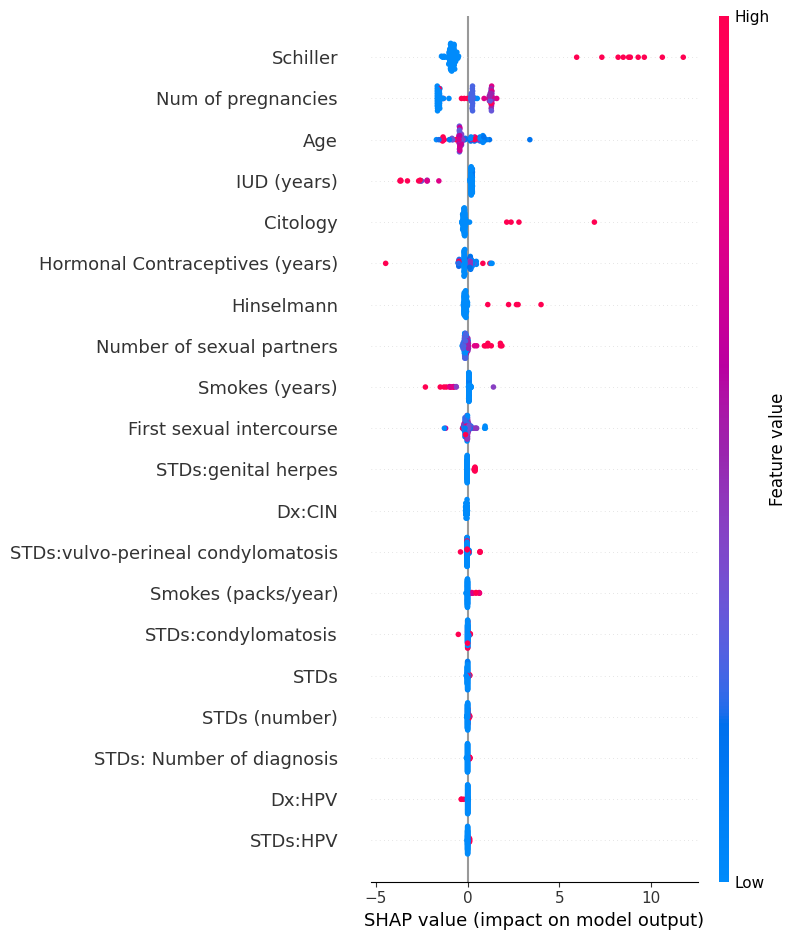

<Figure size 640x480 with 0 Axes>

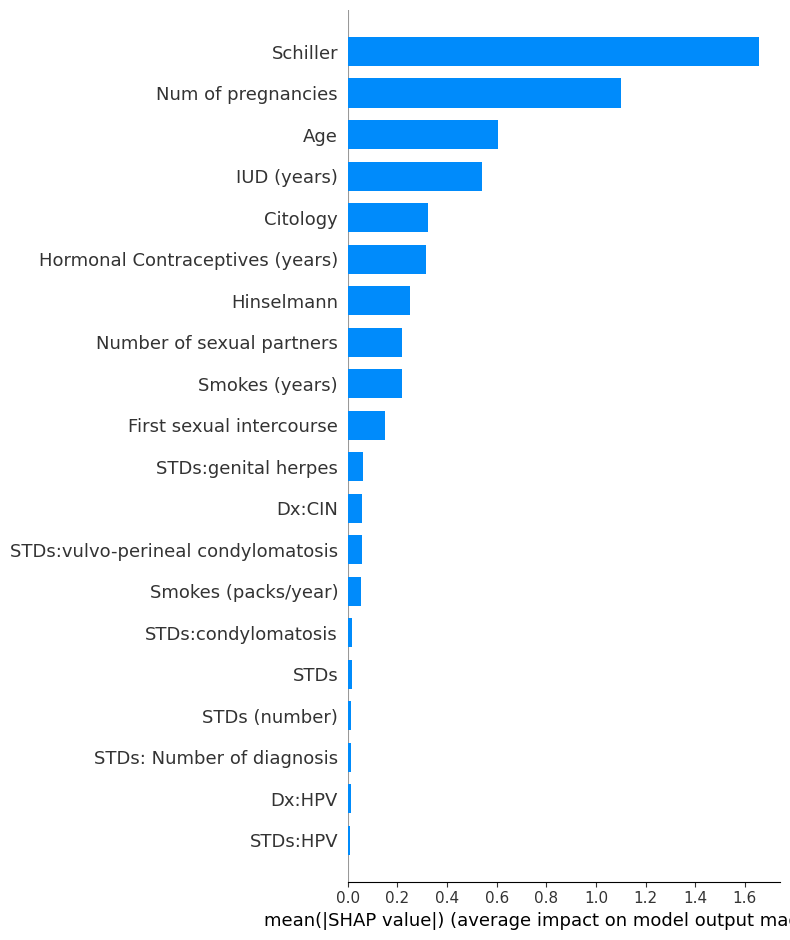

<Figure size 640x480 with 0 Axes>

In [16]:
# 15. Model Interpretation with SHAP (if available)
try:
    import shap
    
    # Create a SHAP explainer
    print("\nGenerating SHAP values for model interpretation...")
    explainer = shap.Explainer(best_model)
    shap_values = explainer(X_test[:100])  # Using a subset for demonstration
    
    # Summary plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test[:100], feature_names=input_df.columns)
    plt.tight_layout()
    plt.show()
    
    # Feature importance plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test[:100], feature_names=input_df.columns, plot_type="bar")
    plt.tight_layout()
    plt.show()
    
except:
    print("SHAP analysis not available (requires shap package)")

In [17]:
import shutil
import os

# Define the source and target directories
source_dir = 'model_artifacts'
streamlit_app_dir = 'streamlit_app'
flask_app_dir = 'flask_app'

# Function to copy the folder if the target directory exists
def copy_folder_if_exists(source, target):
    if os.path.exists(target):
        shutil.copytree(source, os.path.join(target, source), dirs_exist_ok=True)
        print(f"Copied {source} to {target}")
    else:
        print(f"Directory {target} does not exist")

# Copy the model_artifacts folder to streamlit_app and flask_app if they exist
copy_folder_if_exists(source_dir, streamlit_app_dir)
copy_folder_if_exists(source_dir, flask_app_dir)

Copied model_artifacts to streamlit_app
Copied model_artifacts to flask_app


In [18]:
# 16. Summary and Conclusions
print("\n=== Cervical Cancer Risk Prediction Model Summary ===")
print(f"Best model: {best_model_name}")
print(f"Test set accuracy: {final_accuracy:.4f}")
print(f"Test set F1 score: {final_f1:.4f}")
print(f"Test set precision: {final_precision:.4f}")
print(f"Test set recall: {final_recall:.4f}")

# Model performance interpretation
print("\nModel Performance Interpretation:")
if final_f1 > 0.9:
    print("- The model shows excellent performance in predicting cervical cancer risk.")
elif final_f1 > 0.8:
    print("- The model shows very good performance in predicting cervical cancer risk.")
elif final_f1 > 0.7:
    print("- The model shows good performance in predicting cervical cancer risk.")
else:
    print("- The model shows moderate performance in predicting cervical cancer risk.")
    print("- Consider collecting more data or trying different modeling approaches.")

# Print key findings
print("\nKey Findings:")
try:
    print(f"- The most important risk factors are: {', '.join(importance_df.head(5)['Feature'].tolist())}")
except:
    pass

print("\nModel Limitations:")
print("- The imputation of missing values may affect model performance.")
print("- The model should be periodically retrained with new data.")
print("- Clinical validation is necessary before deployment in real-world settings.")

print("\nNext Steps:")
print("1. Validate the model with external data.")
print("2. Consider ensemble methods to improve performance.")
print("3. Develop a web or mobile interface for easy use by healthcare providers.")
print("4. Monitor model performance over time.")

# End of notebook
print("\nNotebook completed successfully!")


=== Cervical Cancer Risk Prediction Model Summary ===
Best model: Gradient Boosting
Test set accuracy: 0.9612
Test set F1 score: 0.7059
Test set precision: 0.6667
Test set recall: 0.7500

Model Performance Interpretation:
- The model shows good performance in predicting cervical cancer risk.

Key Findings:
- The most important risk factors are: Schiller, Age, Hormonal Contraceptives (years), First sexual intercourse, Num of pregnancies

Model Limitations:
- The imputation of missing values may affect model performance.
- The model should be periodically retrained with new data.
- Clinical validation is necessary before deployment in real-world settings.

Next Steps:
1. Validate the model with external data.
2. Consider ensemble methods to improve performance.
3. Develop a web or mobile interface for easy use by healthcare providers.
4. Monitor model performance over time.

Notebook completed successfully!
